<a href="https://colab.research.google.com/github/JoDeMiro/FuzzyBevezetes/blob/main/Python_Fuzzy_TSK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
# https://github.com/JoDeMiro/FuzzyLogic

In [21]:
%%capture
!pip install scikit-fuzzy

In [22]:
import numpy as np
import skfuzzy as fuzzy
from skfuzzy import control as ctrl

import ipywidgets as widgets
import matplotlib.pyplot as plt

from ipywidgets import IntSlider
from ipywidgets import HTML
from ipywidgets import interact, interactive, fixed, interact_manual

Ezt próbálom valahogy modellezni.

https://github.com/caigen/scikit-fuzzy-examples/blob/master/8-tipping-problem-sugeno.py

Takagi Sugeno Kang rendszer az skfuzzy segítségével.


## Washing Time - The easy way

In [23]:
# Create universe

dirt         = ctrl.Antecedent(np.arange(0, 100.1, 0.1), 'dirt')

grease       = ctrl.Antecedent(np.arange(0, 100.1, 0.1), 'grease')

washtime     = ctrl.Consequent(np.arange(0, 60.1, 0.1), 'washtime')

In [24]:
washtime.defuzzify_method = 'centroid'
washtime.universe.mean()

30.0

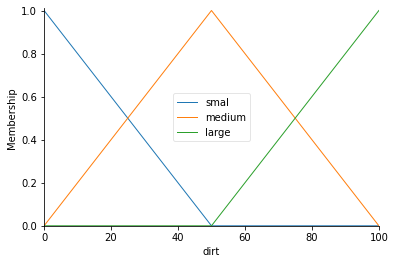

In [25]:
# Határozzuk meg a tagsági függvényeket (ez esetben most a dirt)

dirt['smal']   = fuzzy.trimf(dirt.universe, [0, 0, 50])
dirt['medium'] = fuzzy.trimf(dirt.universe, [0, 50, 100])
dirt['large']  = fuzzy.trimf(dirt.universe, [50, 100, 100])

dirt.view()

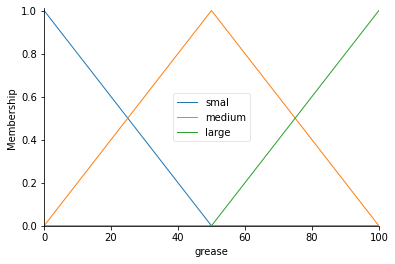

In [26]:
# Határozzuk meg a tagsági függvényeket (ez esetben most a grease)

grease['smal']   = fuzzy.trimf(grease.universe, [0, 0, 50])
grease['medium'] = fuzzy.trimf(grease.universe, [0, 50, 100])
grease['large']  = fuzzy.trimf(grease.universe, [50, 100, 100])

grease.view()

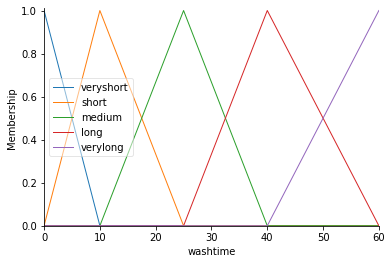

In [27]:
# Most készítsük el a Washtime változó tagsági függvyényeit is.

washtime['veryshort'] = fuzzy.trimf(washtime.universe, [0, 0, 10])
washtime['short']     = fuzzy.trimf(washtime.universe, [0, 10, 25])
washtime['medium']    = fuzzy.trimf(washtime.universe, [10, 25, 40])
washtime['long']      = fuzzy.trimf(washtime.universe, [25, 40, 60])
washtime['verylong']  = fuzzy.trimf(washtime.universe, [40, 60, 60])

washtime.view()

In [28]:
# Most készítsük el a szabályokat

# Hozzáteszem ez nem teljes szabályrendszer lesz
# Ez egy hiányos szabály rendszer
# Itt csak a dok elején meghatározott kérdést akarom megvizsálni

rule1 = ctrl.Rule(antecedent= dirt['medium'] & grease['medium'], consequent = washtime['short'])

rule2 = ctrl.Rule(antecedent= dirt['medium'] & grease['large'], consequent = washtime['medium'])     # Ez a két szabály ad azonos kimenetet

rule3 = ctrl.Rule(antecedent= dirt['large']  & grease['medium'], consequent = washtime['medium'])    # Ez a két szabály ad azonos kimenetet

rule4 = ctrl.Rule(antecedent= dirt['large']  & grease['large'], consequent = washtime['long'])

# rule4 = ctrl.Rule(antecedent= bemenet1['high'] | bemenet2['warm'], consequent = kimenet['increase'])


In [29]:
def fuzzyDemo(dirt_ = 60, grease_ = 70):

  # a szabályok
  print(rule1)
  print(rule2)
  print(rule3)
  print(rule4)

  # négy szabályunk van
  system = ctrl.ControlSystem([rule1, rule2, rule3, rule4])

  simulation = ctrl.ControlSystemSimulation(system)

  simulation.input['dirt'] = dirt_
  simulation.input['grease'] = grease_

  simulation.compute()

  print('------------------------------------------')
  print('washtime  :', simulation.output['washtime'])
  print('------------------------------------------')
  print(simulation.input)

  washtime.view(sim = simulation)
  dirt.view(sim = simulation)
  grease.view(sim = simulation)
  
  return simulation


IF dirt[medium] AND grease[medium] THEN washtime[short]
	AND aggregation function : fmin
	OR aggregation function  : fmax
IF dirt[medium] AND grease[large] THEN washtime[medium]
	AND aggregation function : fmin
	OR aggregation function  : fmax
IF dirt[large] AND grease[medium] THEN washtime[medium]
	AND aggregation function : fmin
	OR aggregation function  : fmax
IF dirt[large] AND grease[large] THEN washtime[long]
	AND aggregation function : fmin
	OR aggregation function  : fmax
------------------------------------------
washtime  : 24.0065359477125
------------------------------------------
dirt : 60
grease : 70



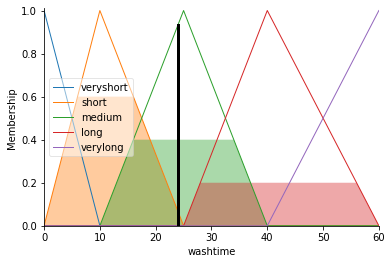

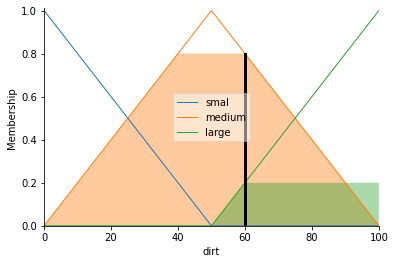

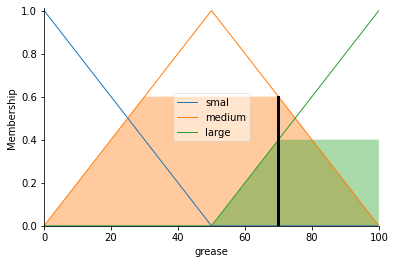

In [30]:
sim = fuzzyDemo()

## Washing Time - The hard way

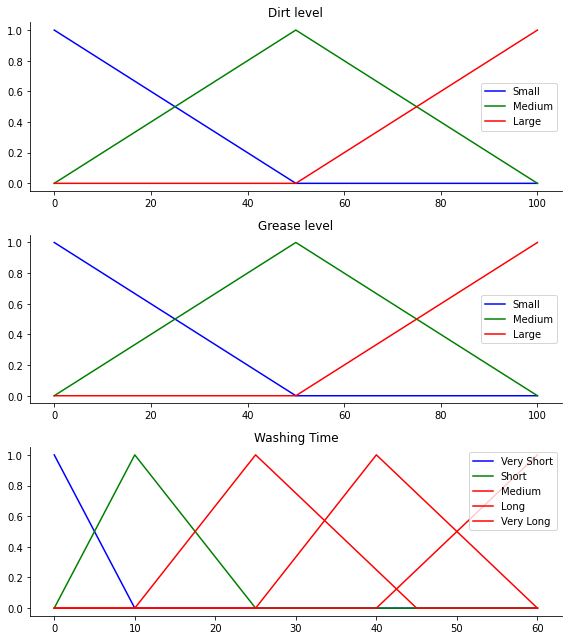

In [31]:
# Generate universe variables
#   * Dirt and grease on subjective ranges [0, 100]
#   * Washing time has a range of [0, 60] in units of percentage points
x_dirt = np.arange(0, 101, 1)
x_grease = np.arange(0, 101, 1)
x_washingtime  = np.arange(0, 61, 1)

# Generate fuzzy membership functions
dirt_small  = fuzzy.trimf(x_dirt, [0, 0, 50])
dirt_medium = fuzzy.trimf(x_dirt, [0, 50, 100])
dirt_large  = fuzzy.trimf(x_dirt, [50, 100, 100])

grease_small  = fuzzy.trimf(x_grease, [0, 0, 50])
grease_medium = fuzzy.trimf(x_grease, [0, 50, 100])
grease_large  = fuzzy.trimf(x_grease, [50, 100, 100])

washingtime_veryshort = fuzzy.trimf(x_washingtime, [0, 0, 10])
washingtime_short     = fuzzy.trimf(x_washingtime, [0, 10, 25])
washingtime_medium    = fuzzy.trimf(x_washingtime, [10, 25, 45])
washingtime_long      = fuzzy.trimf(x_washingtime, [25, 40, 60])
washingtime_verylong  = fuzzy.trimf(x_washingtime, [40, 60, 60])

# Visualize these universes and membership functions
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8, 9))

ax0.plot(x_dirt, dirt_small, 'b', linewidth=1.5, label='Small')
ax0.plot(x_dirt, dirt_medium, 'g', linewidth=1.5, label='Medium')
ax0.plot(x_dirt, dirt_large, 'r', linewidth=1.5, label='Large')
ax0.set_title('Dirt level')
ax0.legend()

ax1.plot(x_grease, grease_small, 'b', linewidth=1.5, label='Small')
ax1.plot(x_grease, grease_medium, 'g', linewidth=1.5, label='Medium')
ax1.plot(x_grease, grease_large, 'r', linewidth=1.5, label='Large')
ax1.set_title('Grease level')
ax1.legend()

ax2.plot(x_washingtime, washingtime_veryshort, 'b', linewidth=1.5, label='Very Short')
ax2.plot(x_washingtime, washingtime_short, 'g', linewidth=1.5, label='Short')
ax2.plot(x_washingtime, washingtime_medium, 'r', linewidth=1.5, label='Medium')
ax2.plot(x_washingtime, washingtime_long, 'r', linewidth=1.5, label='Long')
ax2.plot(x_washingtime, washingtime_verylong, 'r', linewidth=1.5, label='Very Long')
ax2.set_title('Washing Time')
ax2.legend()

# Turn off top/right axes
for ax in (ax0, ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

### Ez itt felül csak archive

Most fogom megcsinálni úgy ahogy az erdetiben van (5 kimenet, 4 szabály)

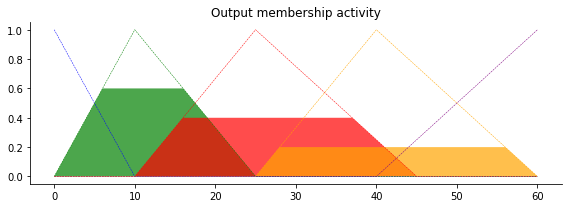

In [32]:
dirt_level = 60
grease_level = 70

# We need the activation of our fuzzy membership functions at these values.
# The exact values 60 and 70 do not exist on our universes...
# This is what fuzz.interp_membership exists for!
dirt_level_small  = fuzzy.interp_membership(x_dirt, dirt_small, dirt_level)
dirt_level_medium = fuzzy.interp_membership(x_dirt, dirt_medium, dirt_level)
dirt_level_large  = fuzzy.interp_membership(x_dirt, dirt_large, dirt_level)

grease_level_small  = fuzzy.interp_membership(x_grease, grease_small, grease_level)
grease_level_medium = fuzzy.interp_membership(x_grease, grease_medium, grease_level)
grease_level_large  = fuzzy.interp_membership(x_grease, grease_large, grease_level)

# Now we take our rules and apply them.
# For rule 1 concerns medium dirt AND medium grease.
# The AND operator means we take the minium of these two.
active_rule1 = np.fmin(dirt_level_medium, grease_level_medium)

# Now we apply this by clipping the top off the corresponding output
# membership function with `np.fmin`
washingtime_activation_short = np.fmin(active_rule1, washingtime_short)  # removed entirely to 0


# For rule 2 concerns medium dirt AND large grease.
active_rule2 = np.fmin(dirt_level_medium, grease_level_large)

# Now we apply this by clipping the top off the corresponding output
# membership function with `np.fmin`
washingtime_activation_medium1 = np.fmin(active_rule2, washingtime_medium)  # removed entirely to 0


# For rule 3 we connect dirt large AND grease medium with medium washing time
active_rule3 = np.fmax(dirt_level_large, grease_level_medium)

# Vigyázat banyek <------- ez overridolja a korábbi változót
washingtime_activation_medium2 = np.fmin(active_rule3, washingtime_medium)

# Ha olyan aggregációs szabályt adok meg, hogy egy adott kimeneti fuzzy halmazhoz több szabály is
# tartozik akkor VAGY operáttorral legyenek összekötve -> a nagyobb értéket vegye figylembe
# vagy lehet hasznáni ÉS operátort -> a kisebb érték legyen figyelembe vége
# úgy látom ez útobbi volt a gyári beállítás az eredeti rendszerben
# Magyarul az aggregáicónál ha két azonos kimenetelű halmazhoz rendeli őket
# akkor két tüzelési érték közül a kisebbet fogja megkapni
# washingtime_activation_medium = np.fmax(washingtime_activation_medium1, washingtime_activation_medium2)
washingtime_activation_medium = np.fmin(washingtime_activation_medium1, washingtime_activation_medium2)


# For rule 4 we connect dirt large AND grease large with long washing time
active_rule4 = np.fmin(dirt_level_large, grease_level_large)
washingtime_activation_long = np.fmin(active_rule4, washingtime_long)

# A következő Fuzzy Halmazok nincsenek rá kötve semmire
# Hogy teljes legyen a kód és ne legyen benne akadás
# Ezért megcsinálom ezeket is 0 val kitöltve

washingtime_activation_veryshort = np.fmin(0, washingtime_veryshort)
washingtime_activation_verylong  = np.fmin(0, washingtime_verylong)
# washingtime_activation_medium    = np.fmin(0, washingtime_medium)

washingtime0 = np.zeros_like(x_washingtime)

# -----------

# Visualize this
fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.fill_between(x_washingtime, washingtime0, washingtime_activation_veryshort, facecolor='b', alpha=0.7)
ax0.plot(x_washingtime, washingtime_veryshort, 'b', linewidth=0.5, linestyle='--', )

ax0.fill_between(x_washingtime, washingtime0, washingtime_activation_short, facecolor='g', alpha=0.7)
ax0.plot(x_washingtime, washingtime_short, 'g', linewidth = 0.5, linestyle = '--', )

ax0.fill_between(x_washingtime, washingtime0, washingtime_activation_medium, facecolor='r', alpha=0.7)
ax0.plot(x_washingtime, washingtime_medium, 'r', linewidth=0.5, linestyle='--')

ax0.fill_between(x_washingtime, washingtime0, washingtime_activation_long, facecolor='orange', alpha=0.7)
ax0.plot(x_washingtime, washingtime_long, 'orange', linewidth = 0.5, linestyle = '--')

ax0.fill_between(x_washingtime, washingtime0, washingtime_activation_verylong, facecolor='purple', alpha=0.7)
ax0.plot(x_washingtime, washingtime_verylong, 'purple', linewidth=0.5, linestyle='--')
ax0.set_title('Output membership activity')

# Turn off top/right axes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

## Aggregáció

In [33]:
# Aggregate all five output membership functions together
aggregated = np.fmax(washingtime_activation_veryshort,
                     np.fmax(washingtime_activation_short,
                             np.fmax(washingtime_activation_medium,
                                     np.fmax(washingtime_activation_long,
                                             washingtime_activation_verylong))))


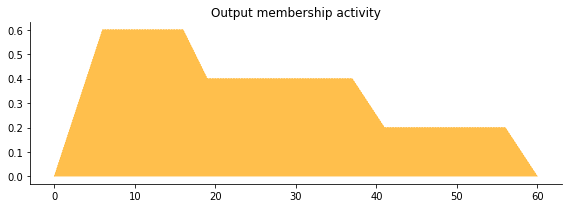

In [34]:
# Visualize this
fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.fill_between(x_washingtime, washingtime0, aggregated, facecolor='orange', alpha=0.7)
ax0.plot(x_washingtime, aggregated, 'orange', linewidth = 0.5, linestyle = '--')
ax0.set_title('Output membership activity')

# Turn off top/right axes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

Washing Time :  24.448657187993692


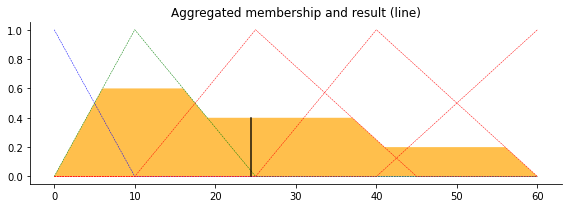

In [35]:

# Calculate defuzzified result
washing_time = fuzzy.defuzz(x_washingtime, aggregated, 'centroid')
washing_time_activation = fuzzy.interp_membership(x_washingtime, aggregated, washing_time)  # for plot

print('Washing Time : ', washing_time)

# Visualize this
fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.plot(x_washingtime, washingtime_veryshort, 'b', linewidth=0.5, linestyle='--', )
ax0.plot(x_washingtime, washingtime_short,     'g', linewidth=0.5, linestyle='--')
ax0.plot(x_washingtime, washingtime_medium,    'r', linewidth=0.5, linestyle='--')
ax0.plot(x_washingtime, washingtime_long,      'r', linewidth=0.5, linestyle='--')
ax0.plot(x_washingtime, washingtime_verylong,  'r', linewidth=0.5, linestyle='--')

ax0.fill_between(x_washingtime, washingtime0, aggregated, facecolor='Orange', alpha=0.7)
ax0.plot([washing_time, washing_time], [0, washing_time_activation], 'k', linewidth=1.5, alpha=0.9)
ax0.set_title('Aggregated membership and result (line)')

# Turn off top/right axes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

## Ez volt a normál eset

Most próbáljuk meg valahogy másképpen csinálni.



```
Right now (eb15e4c) we assume Mamdani (max/min) inference and centroid
defuzzification. That's fine for getting things off the ground, but we should
allow the user to select among several methods.
```

## Larsen Product as implication operator



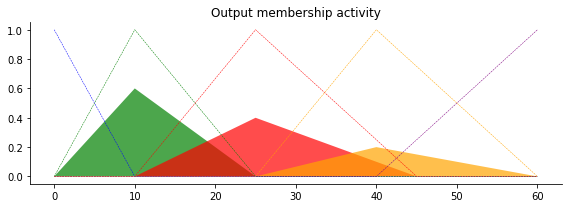

In [36]:
dirt_level = 60
grease_level = 70

# We need the activation of our fuzzy membership functions at these values.
# The exact values 60 and 70 do not exist on our universes...
# This is what fuzz.interp_membership exists for!
dirt_level_small  = fuzzy.interp_membership(x_dirt, dirt_small, dirt_level)
dirt_level_medium = fuzzy.interp_membership(x_dirt, dirt_medium, dirt_level)
dirt_level_large  = fuzzy.interp_membership(x_dirt, dirt_large, dirt_level)

grease_level_small  = fuzzy.interp_membership(x_grease, grease_small, grease_level)
grease_level_medium = fuzzy.interp_membership(x_grease, grease_medium, grease_level)
grease_level_large  = fuzzy.interp_membership(x_grease, grease_large, grease_level)


# ------------------------------------------------------------------------------



# ------------------------------------------------------------------------------


# Now we take our rules and apply them.
# For rule 1 concerns medium dirt AND medium grease.
# The AND operator means we take the minium of these two.
active_rule1 = np.fmin(dirt_level_medium, grease_level_medium)

# Now we apply this by clipping the top off the corresponding output
# membership function with `np.fmin`
washingtime_activation_short = np.fmin(active_rule1, washingtime_short)

# ----> chage this to this

washingtime_activation_short = active_rule1 * washingtime_short




# For rule 2 concerns medium dirt AND large grease.
active_rule2 = np.fmin(dirt_level_medium, grease_level_large)

# Now we apply this by clipping the top off the corresponding output
# membership function with `np.fmin`
washingtime_activation_medium1 = np.fmin(active_rule2, washingtime_medium)

# ----> chage this to this

washingtime_activation_medium1 = active_rule2 * washingtime_medium


# For rule 3 we connect dirt large AND grease medium with medium washing time
active_rule3 = np.fmax(dirt_level_large, grease_level_medium)

# Vigyázat banyek <------- ez overridolja a korábbi változót
washingtime_activation_medium2 = np.fmin(active_rule3, washingtime_medium)

# ----> chage this to this

washingtime_activation_medium2 = active_rule3 * washingtime_medium

# Ha olyan aggregációs szabályt adok meg, hogy egy adott kimeneti fuzzy halmazhoz több szabály is
# tartozik akkor VAGY operáttorral legyenek összekötve -> a nagyobb értéket vegye figylembe
# vagy lehet hasznáni ÉS operátort -> a kisebb érték legyen figyelembe vége
# úgy látom ez útobbi volt a gyári beállítás az eredeti rendszerben
# Magyarul az aggregáicónál ha két azonos kimenetelű halmazhoz rendeli őket
# akkor két tüzelési érték közül a kisebbet fogja megkapni
# washingtime_activation_medium = np.fmax(washingtime_activation_medium1, washingtime_activation_medium2)
washingtime_activation_medium = np.fmin(washingtime_activation_medium1, washingtime_activation_medium2)


# For rule 4 we connect dirt large AND grease large with long washing time
active_rule4 = np.fmin(dirt_level_large, grease_level_large)
washingtime_activation_long = np.fmin(active_rule4, washingtime_long)

# ----> chage this to this

washingtime_activation_long = active_rule4 * washingtime_long

# A következő Fuzzy Halmazok nincsenek rá kötve semmire
# Hogy teljes legyen a kód és ne legyen benne akadás
# Ezért megcsinálom ezeket is 0 val kitöltve

washingtime_activation_veryshort = np.fmin(0, washingtime_veryshort)
washingtime_activation_verylong  = np.fmin(0, washingtime_verylong)
# washingtime_activation_medium    = np.fmin(0, washingtime_medium)

washingtime0 = np.zeros_like(x_washingtime)

# -----------

# Visualize this
fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.fill_between(x_washingtime, washingtime0, washingtime_activation_veryshort, facecolor='b', alpha=0.7)
ax0.plot(x_washingtime, washingtime_veryshort, 'b', linewidth=0.5, linestyle='--', )

ax0.fill_between(x_washingtime, washingtime0, washingtime_activation_short, facecolor='g', alpha=0.7)
ax0.plot(x_washingtime, washingtime_short, 'g', linewidth = 0.5, linestyle = '--', )

ax0.fill_between(x_washingtime, washingtime0, washingtime_activation_medium, facecolor='r', alpha=0.7)
ax0.plot(x_washingtime, washingtime_medium, 'r', linewidth=0.5, linestyle='--')

ax0.fill_between(x_washingtime, washingtime0, washingtime_activation_long, facecolor='orange', alpha=0.7)
ax0.plot(x_washingtime, washingtime_long, 'orange', linewidth = 0.5, linestyle = '--')

ax0.fill_between(x_washingtime, washingtime0, washingtime_activation_verylong, facecolor='purple', alpha=0.7)
ax0.plot(x_washingtime, washingtime_verylong, 'purple', linewidth=0.5, linestyle='--')
ax0.set_title('Output membership activity')

# Turn off top/right axes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

### Hu de izgi, most próbáljuk meg ezt defuzzyfikálni

### Elötte Aggregálni

In [37]:
# Aggregate all five output membership functions together
aggregated = np.fmax(washingtime_activation_veryshort,
                     np.fmax(washingtime_activation_short,
                             np.fmax(washingtime_activation_medium,
                                     np.fmax(washingtime_activation_long,
                                             washingtime_activation_verylong))))


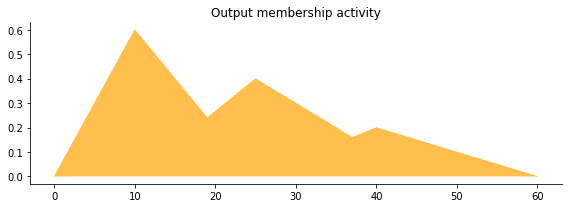

In [38]:
# Visualize this
fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.fill_between(x_washingtime, washingtime0, aggregated, facecolor='orange', alpha=0.7)
ax0.plot(x_washingtime, aggregated, 'orange', linewidth = 0.5, linestyle = '--')
ax0.set_title('Output membership activity')

# Turn off top/right axes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

Washing Time :  22.639269406392707


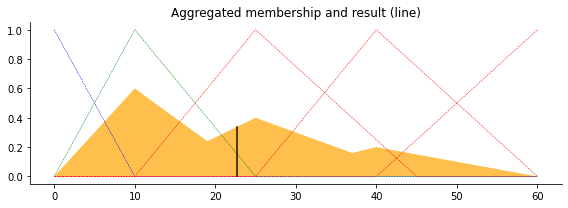

In [39]:

# Calculate defuzzified result
washing_time = fuzzy.defuzz(x_washingtime, aggregated, 'centroid')
washing_time_activation = fuzzy.interp_membership(x_washingtime, aggregated, washing_time)  # for plot

print('Washing Time : ', washing_time)

# Visualize this
fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.plot(x_washingtime, washingtime_veryshort, 'b', linewidth=0.5, linestyle='--', )
ax0.plot(x_washingtime, washingtime_short,     'g', linewidth=0.5, linestyle='--')
ax0.plot(x_washingtime, washingtime_medium,    'r', linewidth=0.5, linestyle='--')
ax0.plot(x_washingtime, washingtime_long,      'r', linewidth=0.5, linestyle='--')
ax0.plot(x_washingtime, washingtime_verylong,  'r', linewidth=0.5, linestyle='--')

ax0.fill_between(x_washingtime, washingtime0, aggregated, facecolor='Orange', alpha=0.7)
ax0.plot([washing_time, washing_time], [0, washing_time_activation], 'k', linewidth=1.5, alpha=0.9)
ax0.set_title('Aggregated membership and result (line)')

# Turn off top/right axes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

## Takagi Sugeno Kang

Próbálkozás, aztán meglátjuk mire megyünk.

67.4


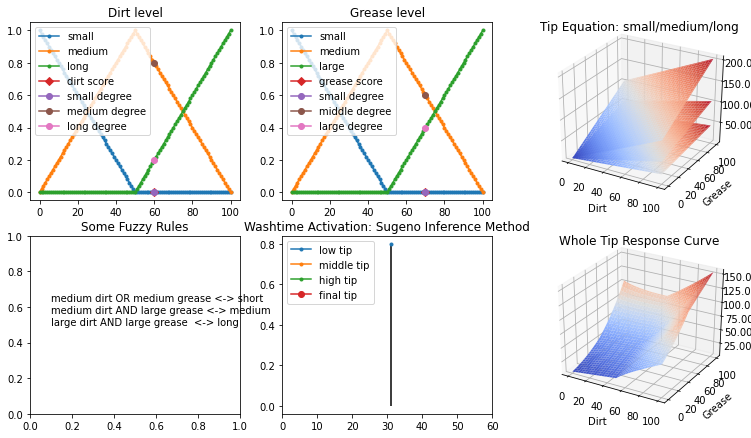

In [59]:
# Generate universe variables
#   * Dirt and grease on subjective ranges [0, 100]
#   * Washing time has a range of [0, 60] in units of percentage points
x_dirt = np.arange(0, 101, 1)
x_grease = np.arange(0, 101, 1)
x_washingtime  = np.arange(0, 61, 1)

# Generate fuzzy membership functions
dirt_small  = fuzzy.trimf(x_dirt, [0, 0, 50])
dirt_medium = fuzzy.trimf(x_dirt, [0, 50, 100])
dirt_large  = fuzzy.trimf(x_dirt, [50, 100, 100])

grease_small  = fuzzy.trimf(x_grease, [0, 0, 50])
grease_medium = fuzzy.trimf(x_grease, [0, 50, 100])
grease_large  = fuzzy.trimf(x_grease, [50, 100, 100])

# washingtime_veryshort = fuzzy.trimf(x_washingtime, [0, 0, 10])
# washingtime_short     = fuzzy.trimf(x_washingtime, [0, 10, 25])
# washingtime_medium    = fuzzy.trimf(x_washingtime, [10, 25, 45])
# washingtime_long      = fuzzy.trimf(x_washingtime, [25, 40, 60])
# washingtime_verylong  = fuzzy.trimf(x_washingtime, [40, 60, 60])

# =======================================
# Sugeno Method: z = f(x, y)
# Washing time equation: z = ax + by + c

"""
# should use 3D data
washingtime_short  = 5.0 + x_dirt * 0.2 + x_grease * 0.2
washingtime_medium = 5.0 + x_dirt * 0.5 + x_grease * 0.5
washingtime_long   = 5.0 + x_dirt * 1.0 + x_grease * 1.0
x_washingtime = x_dirt
"""
# ======================================
#
# Ha jól értem itt külön egyenletek lehet megadni a különböző kimenetkhez
#
# A washingtime lehet short, medium, long, ezekhez lehet hozzárendelni
# a szabályokat, de mindháromhoz külön egyenletet adhatunk meg.
f, s = np.meshgrid(x_dirt, x_grease, indexing="ij")
washtime_short_grid  = 5.0 + s * 0.2 + f * 0.2
washtime_medium_grid = 5.0 + s * 0.5 + f * 0.5
washtime_long_grid   = 5.0 + s + f


# Input: dirt score and grease score
dirt_score = 60
grease_score = 70

# Ez mit csinál?
dirt_small_degree  = fuzzy.interp_membership(x_dirt, dirt_small, dirt_score)
dirt_medium_degree = fuzzy.interp_membership(x_dirt, dirt_medium, dirt_score)
dirt_large_degree  = fuzzy.interp_membership(x_dirt, dirt_large, dirt_score)

grease_small_degree  = fuzzy.interp_membership(x_grease, grease_small, grease_score)
grease_medium_degree = fuzzy.interp_membership(x_grease, grease_medium, grease_score)
grease_large_degree  = fuzzy.interp_membership(x_grease, grease_large, grease_score)


# Whole config
fig_scale_x = 2.0
fig_scale_y = 1.5
fig = plt.figure(figsize=(6.4 * fig_scale_x, 4.8 * fig_scale_y))
row = 2
col = 3

plt.subplot(row, col, 1)
plt.title("Dirt level")
plt.plot(x_dirt, dirt_small, label="small", marker=".")
plt.plot(x_dirt, dirt_medium, label="medium", marker=".")
plt.plot(x_dirt, dirt_large, label="long", marker=".")
plt.plot(dirt_score, 0.0, label="dirt score", marker="D")
plt.plot(dirt_score, dirt_small_degree, label="small degree", marker="o")
plt.plot(dirt_score, dirt_medium_degree, label="medium degree", marker="o")
plt.plot(dirt_score, dirt_large_degree, label="long degree", marker="o")
plt.legend(loc="upper left")

plt.subplot(row, col, 2)
plt.title("Grease level")
plt.plot(x_grease, grease_small, label="small", marker=".")
plt.plot(x_grease, grease_medium, label="medium", marker=".")
plt.plot(x_grease, grease_large, label="large", marker=".")
plt.plot(grease_score, 0.0, label="grease score", marker="D")
plt.plot(grease_score, grease_small_degree, label="small degree", marker="o")
plt.plot(grease_score, grease_medium_degree, label="middle degree", marker="o")
plt.plot(grease_score, grease_large_degree, label="large degree", marker="o")
plt.legend(loc="upper left")

# -------------------------
#
# Uh, elég komplikált módon eddig a sima bemeti változók tagsági fügvényeit
# és a hozzájuk tartozó értékeket készítettük el

# =======================================
# z = f(x, y)
"""
# should use 3D display
plt.subplot(row, col, 3)
plt.title("Washtime")
plt.plot(x_washtime, washtime_short, label="short", marker=".")
plt.plot(x_washtime, washtime_medium, label="medium", marker=".")
plt.plot(x_washtime, washtime_long, label="long", marker=".")
plt.legend(loc="upper left")
"""
ax3 = fig.add_subplot(row, col, 3, projection="3d")
plt.title("Tip Equation: small/medium/long")

# Na jó eddig egy sima ki***t képlet alapján lett kiszámolva
ax3.set_xlabel("Dirt")
ax3.set_ylabel("Grease")
ax3.set_zlabel("Washtime")
ax3.zaxis.set_major_formatter(FormatStrFormatter("%.02f"))
surf1 = ax3.plot_surface(f, s, washtime_short_grid, cmap=cm.coolwarm, linewidth=0)
surf2 = ax3.plot_surface(f, s, washtime_medium_grid, cmap=cm.coolwarm, linewidth=0)
surf3 = ax3.plot_surface(f, s, washtime_long_grid, cmap=cm.coolwarm, linewidth=0)



# =======================================
# Mamdani (max-min) inference method:
# * min because of logic 'and' connective.
# 1) small_degree  <-> washtime_short
# 2) medium_degree <-> washtime_medium
# 3) large_degree  <-> washtime_long
# =======================================
# medium dirt OR medium grease
# rule1 = ctrl.Rule(antecedent= dirt['medium'] & grease['medium'], consequent = washtime['short'])
low_degree = np.fmax(dirt_medium_degree, grease_medium_degree)

# medium dirt AND large grease
# rule2 = ctrl.Rule(antecedent= dirt['medium'] & grease['large'], consequent = washtime['medium'])
middle_degree = np.fmax(dirt_medium_degree, grease_large_degree)

# large dirt AND large grease
# rule4 = ctrl.Rule(antecedent= dirt['large']  & grease['large'], consequent = washtime['long'])
high_degree = np.fmax(dirt_large_degree, grease_large_degree)



plt.subplot(row, col, 4)
plt.title("Some Fuzzy Rules")
t = ("medium dirt OR medium grease <-> short\n"
     "medium dirt AND large grease <-> medium\n"
     "large dirt AND large grease  <-> long")
plt.text(0.1, 0.5, t)
plt.subplot(row, col, 5)
plt.title("Washtime Activation: Sugeno Inference Method")

# Apply the equaltion: - Ez valyon mi alapján történik
# Ja igen, hogy megadtunk három különböző egynletet
# és most ezek lesznek kiszámolva
#
# Kiváncsi vagyok, hogy a bemeti változók tagsági függvéyneihez rendelt
# értékek, hol és hogyna kapnak szerepet

w1 = low_degree
w2 = middle_degree
w3 = high_degree

z1 = 5.0 + 0.2 * dirt_score + 0.2 * grease_score
z2 = 5.0 + 0.5 * dirt_score + 0.5 * grease_score
z3 = 5.0 + 1.0 * dirt_score + 1.0 * grease_score
z = (w1 * z1 + w2 * z2 + w3 * z3) / (w1 + w2 + w3)
print(z)

plt.plot(z1, w1, label="low tip", marker=".")
plt.xlim(0, 60)
plt.vlines(z1, 0.0, w1)
plt.plot(z2, w2, label="middle tip", marker=".")
plt.vlines(z2, 0.0, w2)
plt.plot(z3, w3, label="high tip", marker=".")
plt.vlines(z3, 0.0, w3)
plt.plot(z, 0.0, label="final tip", marker="o")
plt.legend(loc="upper left")

# =======================================
ax6 = fig.add_subplot(row, col, 6, projection="3d")
plt.title("Whole Tip Response Curve")

for i in range(0, len(f)):      # f <- x_dirt
    for j in range(0, len(s)):  # s <- x_grease
        x = f[i, j]
        y = s[i, j]
        # Kiszámolja a dirt változó illetékességi szintjét mindhárom tagsági függvényre (small, medium, large)
        f_small_degree  = fuzzy.interp_membership(x_dirt, dirt_small, x)
        f_medium_degree = fuzzy.interp_membership(x_dirt, dirt_medium, x)
        f_large_degree  = fuzzy.interp_membership(x_dirt, dirt_large, x)

        # Kiszámolja a grease változó illetékességi szintjét mindhárom tagsági függvényre (small, medium, large)
        s_small_degree  = fuzzy.interp_membership(x_grease, grease_small, y)
        s_medium_degree = fuzzy.interp_membership(x_grease, grease_medium, y)
        s_large_degree  = fuzzy.interp_membership(x_grease, grease_large, y)

        # itt alkotja meg a szabályokat
        w1 = np.fmax(s_small_degree, f_medium_degree)
        w2 = np.fmax(s_medium_degree, f_large_degree) 
        w3 = np.fmax(s_large_degree, f_large_degree)

        # De miért csak a long gridet számolja ki?
        washtime_long_grid[i, j] = (w1 * washtime_short_grid[i, j]
                                  + w2 * washtime_medium_grid[i, j]
                                  + w3 * washtime_long_grid[i, j]) / (w1 + w2 + w3)

ax6.set_xlabel("Dirt")
ax6.set_ylabel("Grease")
ax6.set_zlabel("Washtime")
ax6.zaxis.set_major_formatter(FormatStrFormatter("%.02f"))
surf6 = ax6.plot_surface(f, s, washtime_long_grid, cmap=cm.coolwarm, linewidth=0)

# plt.savefig("img/8-tipping-problem-sugeno.png")
plt.show()


## Huh ez bonyi

Itt hagyom inkább az eredeti példát további kutatásra.

17.075000000000003


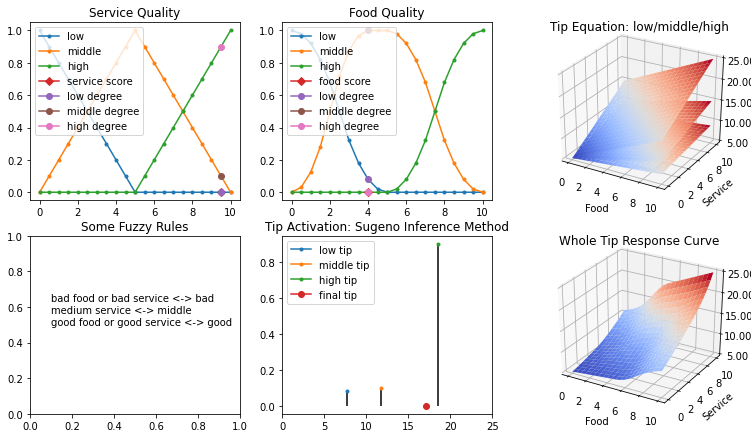

In [44]:
  
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import skfuzzy as fuzz
from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib.ticker import FormatStrFormatter

# for flake8 check
Axes3D

# Problem: from service quality and food quality to tip amount
x_service = np.arange(0, 10.01, 0.5)
x_food = np.arange(0, 10.01, 0.5)
x_tip = np.arange(0, 25.01, 1.0)

# Membership functions
service_low = fuzz.trimf(x_service, [0, 0, 5])
service_middle = fuzz.trimf(x_service, [0, 5, 10])
service_high = fuzz.trimf(x_service, [5, 10, 10])

# food_low = fuzz.trimf(x_food, [0, 0, 5])
# food_middle = fuzz.trimf(x_food, [0, 5, 10])
# food_high = fuzz.trimf(x_food, [5, 10, 10])
food_low = fuzz.zmf(x_food, 0, 5)
food_middle = fuzz.pimf(x_food, 0, 4, 5, 10)
food_high = fuzz.smf(x_food, 5, 10)

# =======================================
# Sugeno Method: z = f(x, y)
# Tip equation: z = ax + by + c
"""
# should use 3D data
tip_low = 5.0 + x_service * 0.2 + x_food * 0.2
tip_middle = 5.0 + x_service * 0.5 + x_food * 0.5
tip_high = 5.0 + x_service * 1.0 + x_food * 1.0
x_tip = x_food
"""
f, s = np.meshgrid(x_food, x_service, indexing="ij")
tip_low_grid = 5.0 + s * 0.2 + f * 0.2
tip_middle_grid = 5.0 + s * 0.5 + f * 0.5
tip_high_grid = 5.0 + s + f

# Input: service score and food score
service_score = 9.5
food_score = 4.0

service_low_degree = fuzz.interp_membership(
    x_service, service_low, service_score)
service_middle_degree = fuzz.interp_membership(
    x_service, service_middle, service_score)
service_high_degree = fuzz.interp_membership(
    x_service, service_high, service_score)

food_low_degree = fuzz.interp_membership(x_food, food_low, food_score)
food_middle_degree = fuzz.interp_membership(x_food, food_middle, food_score)
food_high_degree = fuzz.interp_membership(x_food, food_high, food_score)

# Whole config
fig_scale_x = 2.0
fig_scale_y = 1.5
fig = plt.figure(figsize=(6.4 * fig_scale_x, 4.8 * fig_scale_y))
row = 2
col = 3

plt.subplot(row, col, 1)
plt.title("Service Quality")
plt.plot(x_service, service_low, label="low", marker=".")
plt.plot(x_service, service_middle, label="middle", marker=".")
plt.plot(x_service, service_high, label="high", marker=".")
plt.plot(service_score, 0.0, label="service score", marker="D")
plt.plot(service_score, service_low_degree,
         label="low degree", marker="o")
plt.plot(service_score, service_middle_degree,
         label="middle degree", marker="o")
plt.plot(service_score, service_high_degree,
         label="high degree", marker="o")
plt.legend(loc="upper left")

plt.subplot(row, col, 2)
plt.title("Food Quality")
plt.plot(x_food, food_low, label="low", marker=".")
plt.plot(x_food, food_middle, label="middle", marker=".")
plt.plot(x_food, food_high, label="high", marker=".")
plt.plot(food_score, 0.0, label="food score", marker="D")
plt.plot(food_score, food_low_degree, label="low degree", marker="o")
plt.plot(food_score, food_middle_degree, label="middle degree", marker="o")
plt.plot(food_score, food_high_degree, label="high degree", marker="o")
plt.legend(loc="upper left")

# =======================================
# z = f(x, y)
"""
# should use 3D display
plt.subplot(row, col, 3)
plt.title("Tip")
plt.plot(x_tip, tip_low, label="low", marker=".")
plt.plot(x_tip, tip_middle, label="middle", marker=".")
plt.plot(x_tip, tip_high, label="high", marker=".")
plt.legend(loc="upper left")
"""
ax3 = fig.add_subplot(row, col, 3, projection="3d")
plt.title("Tip Equation: low/middle/high")

ax3.set_xlabel("Food")
ax3.set_ylabel("Service")
ax3.set_zlabel("Tip")
ax3.zaxis.set_major_formatter(FormatStrFormatter("%.02f"))
surf1 = ax3.plot_surface(f, s, tip_low_grid, cmap=cm.coolwarm, linewidth=0)
surf2 = ax3.plot_surface(f, s, tip_middle_grid, cmap=cm.coolwarm, linewidth=0)
surf3 = ax3.plot_surface(f, s, tip_high_grid, cmap=cm.coolwarm, linewidth=0)

# =======================================
# Mamdani (max-min) inference method:
# * min because of logic 'and' connective.
# 1) low_degree <-> tip_low
# 2) middle_degree <-> tip_middle
# 3) high_degree <-> tip_high

# =======================================
# bad food OR bad service
low_degree = np.fmax(service_low_degree, food_low_degree)
# medium service
middle_degree = service_middle_degree
# good food OR good service
high_degree = np.fmax(service_high_degree, food_high_degree)

plt.subplot(row, col, 4)
plt.title("Some Fuzzy Rules")
t = ("bad food or bad service <-> bad\n"
     "medium service <-> middle\n"
     "good food or good service <-> good")
plt.text(0.1, 0.5, t)

plt.subplot(row, col, 5)
plt.title("Tip Activation: Sugeno Inference Method")

# Apply the equaltion:
w1 = low_degree
w2 = middle_degree
w3 = high_degree

z1 = 5.0 + 0.2 * food_score + 0.2 * service_score
z2 = 5.0 + 0.5 * food_score + 0.5 * service_score
z3 = 5 + 1.0 * food_score + 1.0 * service_score
z = (w1 * z1 + w2 * z2 + w3 * z3) / (w1 + w2 + w3)
print(z)

plt.plot(z1, w1, label="low tip", marker=".")
plt.xlim(0, 25)
plt.vlines(z1, 0.0, w1)
plt.plot(z2, w2, label="middle tip", marker=".")
plt.vlines(z2, 0.0, w2)
plt.plot(z3, w3, label="high tip", marker=".")
plt.vlines(z3, 0.0, w3)
plt.plot(z, 0.0, label="final tip", marker="o")
plt.legend(loc="upper left")

# =======================================
ax6 = fig.add_subplot(row, col, 6, projection="3d")
plt.title("Whole Tip Response Curve")

for i in range(0, len(f)):
    for j in range(0, len(s)):
        x = f[i, j]
        y = s[i, j]
        f_low_degree = fuzz.interp_membership(x_food, food_low, x)
        f_middle_degree = fuzz.interp_membership(x_food, food_middle, x)
        f_high_degree = fuzz.interp_membership(x_food, food_high, x)

        s_low_degree = fuzz.interp_membership(x_service, service_low, y)
        s_middle_degree = fuzz.interp_membership(x_service, service_middle, y)
        s_high_degree = fuzz.interp_membership(x_service, service_high, y)

        w1 = np.fmax(s_low_degree, f_low_degree)
        w2 = s_middle_degree
        w3 = np.fmax(s_high_degree, f_high_degree)

        tip_high_grid[i, j] = (w1 * tip_low_grid[i, j]
                               + w2 * tip_middle_grid[i, j]
                               + w3 * tip_high_grid[i, j]) / (w1 + w2 + w3)

ax6.set_xlabel("Food")
ax6.set_ylabel("Service")
ax6.set_zlabel("Tip")
ax6.zaxis.set_major_formatter(FormatStrFormatter("%.02f"))
surf6 = ax6.plot_surface(f, s, tip_high_grid, cmap=cm.coolwarm, linewidth=0)

# plt.savefig("img/8-tipping-problem-sugeno.png")
plt.show()



## Vége a Jegyzettömbnek

A többi már csak maradék, ha instrumentálisan akarj játszani vele az ember, de nincs befejezve.

## Igy is vissza lehet kapni az adott bemenet tagsággi függvényhez tartozó értékét

In [ ]:
dirt.terms

OrderedDict([('smal', dirt[smal]),
             ('medium', dirt[medium]),
             ('large', dirt[large])])

In [ ]:
# mfx = fuzzy.trimf(dirt.universe, [0, 10, 10])
mfx = dirt.__getitem__('medium').mf
print(mfx.shape)

# mik a tagsággi függvényhez tartozó értékek a következ pontokban (1, 2, 3.5, 5)
fuzzy.interp_membership(dirt.universe, mfx, [1.0, 2.0, 3.5, 5.0, 10])

(1001,)


array([0.02, 0.04, 0.07, 0.1 , 0.2 ])

In [ ]:
print(dirt.__len__())
print(dirt.__getitem__('smal'))
a = dirt.__getitem__('smal')
print(type(a))
b = a.membership_value
print(type(b))
a.mf

# Elég bonyolultan de le lehet hívni bemenet1 objektumból a magát a tagsági függvényt (mf)
fuzzy.interp_membership(dirt.universe, dirt.__getitem__('smal').mf, [1, 2, 3.5, 5])

1001
dirt[smal]
<class 'skfuzzy.control.term.Term'>
<class 'skfuzzy.control.state.StatePerSimulation'>


array([0.98, 0.96, 0.93, 0.9 ])

In [ ]:
# ide kéne egy olyan plotot raknom ami mutatja az adott függvényt,
# és mutatja az egyes x, hez tartozó értéket minkét (ha egynél több átviteli függvényhez is tartozik az y)

OrderedDict([('smal', dirt[smal]), ('medium', dirt[medium]), ('large', dirt[large])])
dirt['smal'](3) : 	0.40
dirt['medium'](3) : 	0.60
dirt['large'](3) : 	0.00


Text(301, 0.0, '0.00')

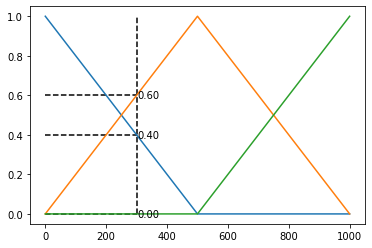

In [ ]:
plt.plot(dirt['smal'].mf)
plt.plot(dirt['medium'].mf)
plt.plot(dirt['large'].mf)

print(dirt.terms)

x = 30
_x = x * 10

# Elég bonyolultan de le lehet hívni bemenet1 objektumból a magát a tagsági függvényt (mf)
y_dirt_smal    = fuzzy.interp_membership(dirt.universe, dirt.__getitem__('smal').mf, [x])
y_dirt_medium  = fuzzy.interp_membership(dirt.universe, dirt.__getitem__('medium').mf, [x])
y_dirt_large   = fuzzy.interp_membership(dirt.universe, dirt.__getitem__('large').mf, [x])


print("dirt['smal'](3) : \t{0:0.2f}".format(y_dirt_smal[0]))
print("dirt['medium'](3) : \t{0:0.2f}".format(y_dirt_medium[0]))
print("dirt['large'](3) : \t{0:0.2f}".format(y_dirt_large[0]))

plt.vlines(_x, ymin = 0, ymax = 1, colors = 'k', linestyles = 'dashed')

plt.hlines(y_dirt_smal, xmin = 0, xmax = _x, colors = 'k', linestyles = 'dashed')
plt.hlines(y_dirt_medium, xmin = 0, xmax = _x, colors = 'k', linestyles = 'dashed')
plt.hlines(y_dirt_large, xmin = 0, xmax = _x, colors = 'k', linestyles = 'dashed')

plt.text(_x + 1, y_dirt_smal[0], '{:0.2f}'.format(y_dirt_smal[0]), verticalalignment = 'center')
plt.text(_x + 1, y_dirt_medium[0], '{:0.2f}'.format(y_dirt_medium[0]), verticalalignment ='center')
plt.text(_x + 1, y_dirt_large[0], '{:0.2f}'.format(y_dirt_large[0]), verticalalignment ='center')


## Defuzzify this membership function five ways

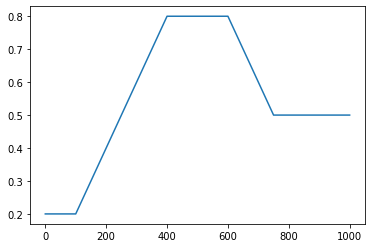

In [ ]:
dirt_smal = dirt.__getitem__('smal').mf.copy()
dirt_medium = dirt.__getitem__('medium').mf.copy()
dirt_large  = dirt.__getitem__('large').mf.copy()

smal_illetekessegi_szint = 0.2
medium_illetekessegi_szint = 0.8
large_illetekessegi_szint = 0.5

dirt_smal[dirt_smal > smal_illetekessegi_szint] = smal_illetekessegi_szint
dirt_medium[dirt_medium > medium_illetekessegi_szint] = medium_illetekessegi_szint
dirt_large[dirt_large > large_illetekessegi_szint] = large_illetekessegi_szint

# maximum aggregáció alkalmazásával
aggregalt_mf = np.maximum(dirt_smal, dirt_medium)
aggregalt_mf = np.maximum(aggregalt_mf, dirt_large)
plt.plot(aggregalt_mf)

ymax  = [0.8, 0.8, 0.8, 0.8, 0.8]
xvals = [53.868778280542884, 53.28124999999997, 50.0, 40.0, 60.0]


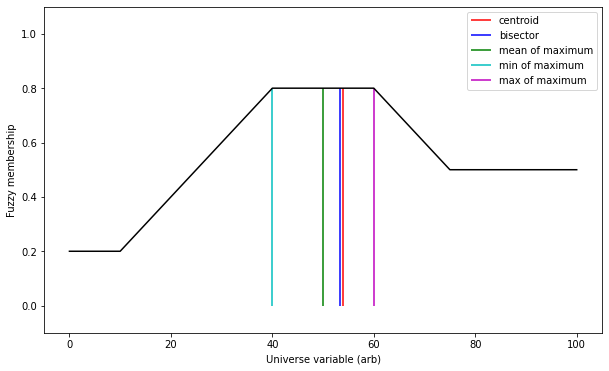

In [ ]:
mx  = np.arange(0, 100.1, 0.1)

defuzz_centroid = fuzzy.defuzz(mx, aggregalt_mf, 'centroid')
defuzz_bisector = fuzzy.defuzz(mx, aggregalt_mf, 'bisector')
defuzz_mom = fuzzy.defuzz(mx, aggregalt_mf, 'mom')
defuzz_som = fuzzy.defuzz(mx, aggregalt_mf, 'som')
defuzz_lom = fuzzy.defuzz(mx, aggregalt_mf, 'lom')

names = [defuzz_centroid, defuzz_bisector, defuzz_mom, defuzz_som, defuzz_lom]


# Collect info for vertical lines
labels = ['centroid', 'bisector', 'mean of maximum', 'min of maximum',
          'max of maximum']
xvals = [defuzz_centroid,
         defuzz_bisector,
         defuzz_mom,
         defuzz_som,
         defuzz_lom]
colors = ['r', 'b', 'g', 'c', 'm']
ymax = [fuzzy.interp_membership(mx, aggregalt_mf, i) for i in xvals]

print('ymax  =', ymax)
print('xvals =', xvals)


#  Display and compare defuzzification results against membership function
plt.figure(figsize=(10, 6))

plt.plot(mx, aggregalt_mf, 'k')
for xv, y, label, color in zip(xvals, ymax, labels, colors):
    plt.vlines(xv, 0, y, label=label, color=color)
plt.ylabel('Fuzzy membership')
plt.xlabel('Universe variable (arb)')
plt.ylim(-0.1, 1.1)
plt.legend(loc=1)

plt.show()

In [ ]:
for key in dirt.terms.keys():
  print(key)

smal
medium
large


dirt['smal'](3) : 	0.40
dirt['medium'](3) : 	0.60
dirt['large'](3) : 	0.00


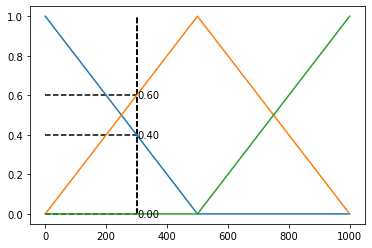

In [ ]:
for key in dirt.terms.keys():
  plt.plot(dirt[key].mf)

  x = 30
  _x = x * 10

  value = fuzzy.interp_membership(dirt.universe, dirt.__getitem__(key).mf, [x])

  print("dirt['{0}'](3) : \t{1:0.2f}".format(key, value[0]))

  plt.vlines(_x, ymin = 0, ymax = 1, colors = 'k', linestyles = 'dashed')
  plt.hlines(value, xmin = 0, xmax = _x, colors = 'k', linestyles = 'dashed')
  plt.text(_x + 1, value[0], '{:0.2f}'.format(value[0]), verticalalignment = 'center')


### Eddig jó

Az már kiderült, hogy a kimenet.defuzzyfy_method = 'som' segítségével meg tudom adni, hogy milyen defuzzifikációs eljárással számolja ki az eredményeket és ez működik is.

Most csináljunk egy rövidített interaktív demot ahol a defuzzifikáció módja is állítható paraméter.

In [ ]:
def fuzzyDemoA(dirt_ = 60, grease_ = 70, mode_ = ['centroid']):

  # set defuz
  washtime.defuzzify_method = mode_

  # négy szabályunk van
  system = ctrl.ControlSystem([rule1, rule2, rule3, rule4])

  simulation = ctrl.ControlSystemSimulation(system)

  simulation.input['dirt'] = dirt_
  simulation.input['grease'] = grease_

  simulation.compute()

  print('------------------------------------------')
  print('washtime  :', simulation.output['washtime'])
  print('------------------------------------------')
  print(simulation.input)

  washtime.view(sim = simulation)
  dirt.view(sim = simulation)
  grease.view(sim = simulation)
  
  return simulation

In [ ]:
f = interact(fuzzyDemoA, dirt_ = (0, 100), grease_ = (0, 100), mode_ = ['centroid','bisector', 'mom', 'som', 'lom']);

interactive(children=(IntSlider(value=60, description='dirt_'), IntSlider(value=70, description='grease_'), Dr…

## A teljes kimeneti tér ábrázolása a két bemeneti változó függvényében

In [ ]:

# A kiértékelés nagyobb felbontással is elvégezhető de több számítással jár

dirt_space   = np.linspace(1, 100, 100)
grease_space = np.linspace(1, 100, 100)

x, y = np.meshgrid(dirt_space, grease_space)
z = np.zeros_like(x)

# Setup Defuz
washtime.defuzzify_method = 'centroid'

# Setup system
system = ctrl.ControlSystem([rule1, rule2, rule3, rule4])
simulation = ctrl.ControlSystemSimulation(system)

# Loop through the system 10*10 times to collect the control surface
for i in range(len(dirt_space)):
  for j in range(len(grease_space)): 
    simulation.input['dirt'] = x[i, j]
    simulation.input['grease'] = y[i, j]
    simulation.compute()
    z[i, j] = simulation.output['washtime']

In [ ]:
# Plot the result in pretty 3D with alpha blending
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

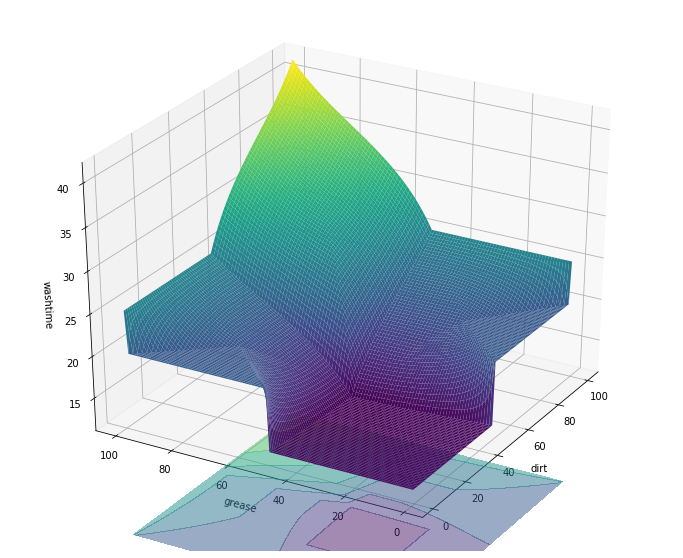

In [ ]:
# Plot the result in pretty 3D with alpha blending

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('dirt')
ax.set_ylabel('grease')
ax.set_zlabel('washtime')

surf = ax.plot_surface(x, y, z, rstride = 1, cstride = 1, cmap = 'viridis', linewidth = 0.4, antialiased = True)

cset = ax.contourf(x, y, z, zdir = 'z', offset = -2.5, cmap = 'viridis', alpha = 0.5)

ax.view_init(30, 210)


```
# Köszönöm a figyelmet
```

```
     Istvan Pintye
     ---------------------------------------------------------
     MTA SZTAKI Computer and Automation Research Institute
                Hungarian Academy of Sciences,
     Laboratory of Parallel and Distributed Systems
     Postal    : P.O.Box 63. H-1518 Budapest, Hungary
     Location  : 1132 Budapest Victor Hugo u. 18-22. Hungary
     Phone/Fax : +36 1 329-78-64 (secretary)
     Mobile    : +36 30 822-5188
     E-mail    : pintye@sztaki.hu
     ---------------------------------------------------------
```

